# **Air Quality Index (AQI) Prediction**

This notebook demonstrates AQI prediction using a **Random Forest Regressor** and **XG Boost Regressoe** model. To improve performance, **GridSearchCV** is used for hyperparameter tuning.
<br><br>
Dataset link : https://github.com/cp099/India-Air-Quality-Dataset/blob/main/Delhi_AQI_Dataset.csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./Data/Delhi_AQI_Dataset.csv')

In [4]:
df.head()

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3,Unnamed: 9,Unnamed: 10
0,Delhi,01/01/18,406,223.3,438.48,336.98,462.84,4.26,385.7,NaN,NaN
1,Delhi,02/01/18,418,229.9,451.44,346.94,476.52,4.39,397.1,NaN,NaN
2,Delhi,03/01/18,382,210.1,412.56,317.06,435.48,4.01,362.9,NaN,NaN
3,Delhi,04/01/18,366,201.3,395.28,303.78,417.24,3.84,347.7,NaN,NaN
4,Delhi,05/01/18,390,214.5,421.20,323.70,444.60,4.10,370.5,NaN,NaN


In [5]:
df = df.drop(columns=['Unnamed: 10','Unnamed: 9','City'])

In [6]:
df.head()

,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,01/01/18,406,223.3,438.48,336.98,462.84,4.26,385.7
1,02/01/18,418,229.9,451.44,346.94,476.52,4.39,397.1
2,03/01/18,382,210.1,412.56,317.06,435.48,4.01,362.9
3,04/01/18,366,201.3,395.28,303.78,417.24,3.84,347.7
4,05/01/18,390,214.5,421.20,323.70,444.60,4.10,370.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2191 non-null   object 
 1   AQI     2191 non-null   int64  
 2   PM2.5   2191 non-null   float64
 3   PM10    2191 non-null   float64
 4   NO2     2191 non-null   float64
 5   SO2     2191 non-null   float64
 6   CO      2191 non-null   float64
 7   O3      2191 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 137.1+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

C:\Users\vedan\AppData\Local\Temp\ipykernel_19840\2345423161.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2191 non-null   datetime64[ns]
 1   AQI     2191 non-null   int64         
 2   PM2.5   2191 non-null   float64       
 3   PM10    2191 non-null   float64       
 4   NO2     2191 non-null   float64       
 5   SO2     2191 non-null   float64       
 6   CO      2191 non-null   float64       
 7   O3      2191 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 137.1 KB


In [9]:
df.head(12)

,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,2018-01-01,406,223.30,438.48,336.98,462.84,4.26,385.70
1,2018-02-01,418,229.90,451.44,346.94,476.52,4.39,397.10
2,2018-03-01,382,210.10,412.56,317.06,435.48,4.01,362.90
3,2018-04-01,366,201.30,395.28,303.78,417.24,3.84,347.70
4,2018-05-01,390,214.50,421.20,323.70,444.60,4.10,370.50
5,2018-06-01,405,222.75,437.40,336.15,461.70,4.25,384.75
6,2018-07-01,355,195.25,383.40,294.65,404.70,3.73,337.25
7,2018-08-01,288,158.40,311.04,239.04,328.32,3.02,273.60
8,2018-09-01,359,197.45,387.72,297.97,409.26,3.77,341.05
9,2018-10-01,352,193.60,380.16,292.16,401.28,3.70,334.40


In [10]:
print(df['Date'].min())
print(df['Date'].max())

2018-01-01 00:00:00
2024-12-31 00:00:00


In [11]:
df = df.sort_values('Date')
df.head()

,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,2018-01-01,406,223.30,438.48,336.98,462.84,4.26,385.70
31,2018-01-02,274,150.70,295.92,227.42,312.36,2.88,260.30
59,2018-01-03,257,141.35,277.56,213.31,292.98,2.70,244.15
90,2018-01-04,195,107.25,210.60,161.85,222.30,2.05,185.25
120,2018-01-05,177,97.35,191.16,146.91,201.78,1.86,168.15


In [12]:
df.drop(columns=['Date']).describe()


,AQI,PM2.5,PM10,NO2,SO2,CO,O3
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,208.285714,114.557143,224.948571,172.877143,237.445714,2.187307,197.871429
std,106.614654,58.638060,115.143827,88.490163,121.540706,1.119494,101.283922
min,41.000000,22.550000,44.280000,34.030000,46.740000,0.430000,38.950000
25%,117.000000,64.350000,126.360000,97.110000,133.380000,1.230000,111.150000
50%,190.000000,104.500000,205.200000,157.700000,216.600000,2.000000,180.500000
75%,289.000000,158.950000,312.120000,239.870000,329.460000,3.030000,274.550000
max,494.000000,271.700000,533.520000,410.020000,563.160000,5.190000,469.300000


In [13]:
year = range(2018,2025)

for y in year:
  print(y,len(df[df['Date'].dt.year == y]))

2018 365
2019 365
2020 365
2021 365
2022 0
2023 365
2024 366


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

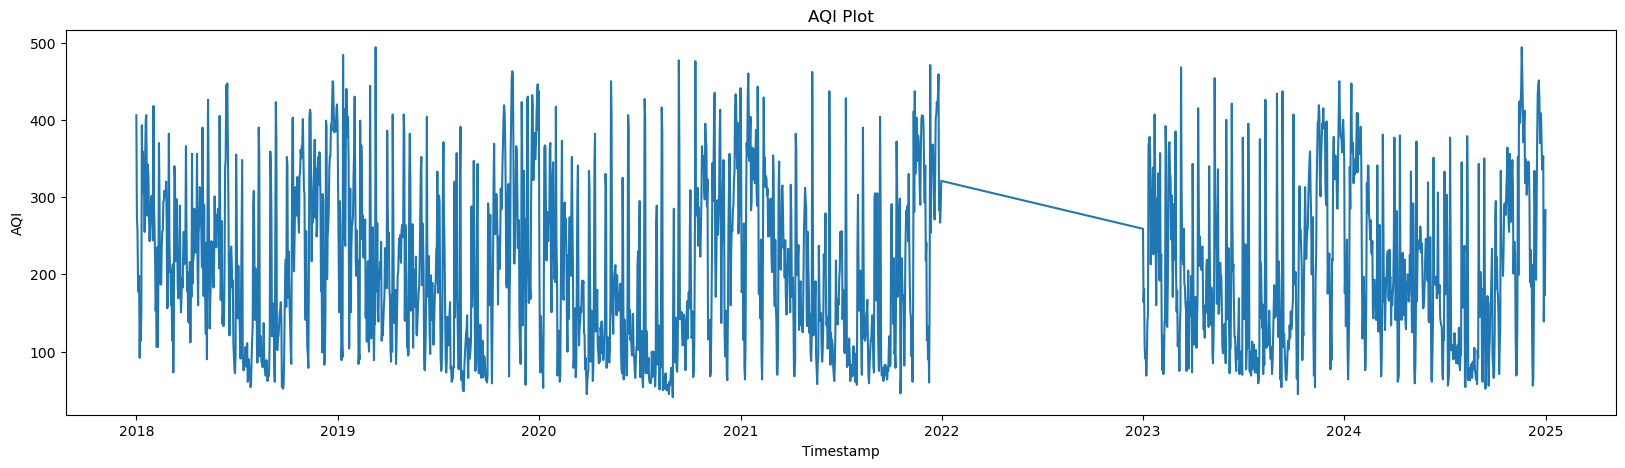

In [15]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'],df['AQI'])
plt.xlabel('Timestamp')
plt.ylabel('AQI')
plt.title(f'AQI Plot')
plt.show();

In [16]:
df = df.drop(columns=['Date'])

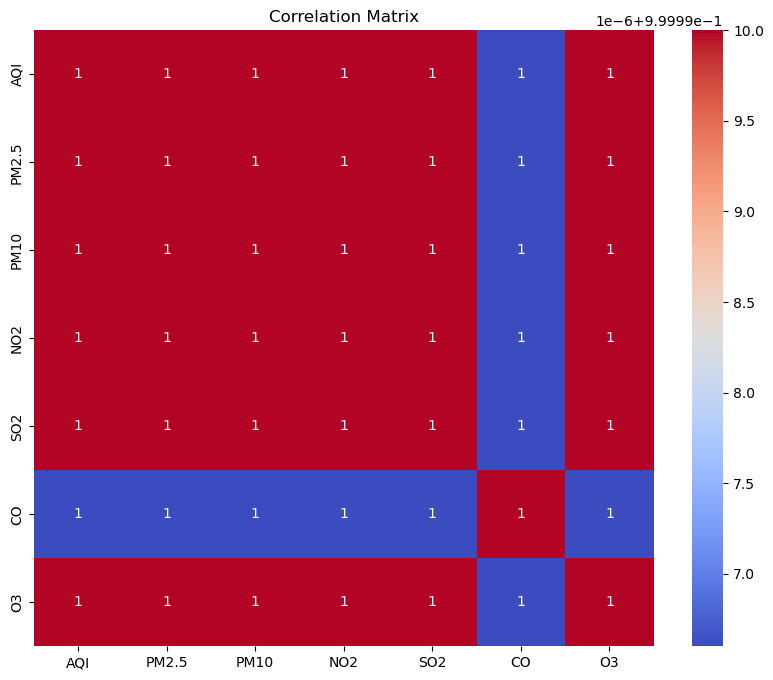

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
constant_cols = [
    col for col in df.columns
    if df[col].nunique() == 1
]

print("Constant columns:", constant_cols)


Constant columns: []


In [19]:
# Check pairwise identical columns
for i, col1 in enumerate(df.columns):
    for col2 in df.columns[i+1:]:
        if df[col1].equals(df[col2]):
            print(f"Columns {col1} and {col2} are identical!")
else:
  print("No Duplicate Columns")

No Duplicate Columns


In [20]:
#save the cleaned df for future use
df.to_csv('./Data/Delhi_AQI_Dataset_cleaned.csv')

In [21]:
X = df.drop(columns=["AQI"])
y = df["AQI"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1752, 6)
(439, 6)
(1752,)
(439,)


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    'n_estimators': list(range(5,105,5)),
    'max_depth': [10,20,30,40,None],
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, None],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100]},
             scoring='neg_mean_absolute_error')

In [24]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MAE: {-grid_search.best_score_:.4f}")

Best parameters: {'max_depth': 20, 'n_estimators': 65}
Best CV MAE: 0.0846


In [25]:
final_model = grid_search.best_estimator_

In [26]:
y_pred = final_model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", round(mae,5))

Test MAE: 0.02835


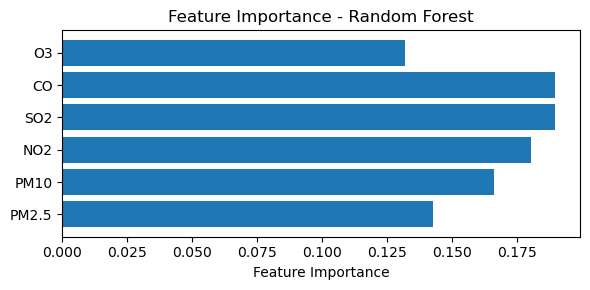

In [28]:
feature_importances = final_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(6, 3))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show();

In [29]:
from xgboost import XGBRegressor

In [30]:
param_grid = {
    'n_estimators': list(range(5,105,5)),
    'max_depth': [10,20,30,40,None],
}

grid_search_xg = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search_xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, None],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100]},
             scoring='neg_mean_absolute_error')

In [31]:
print(f"Best parameters: {grid_search_xg.best_params_}")
print(f"Best CV MAE: {-grid_search_xg.best_score_:.4f}")

Best parameters: {'max_depth': 40, 'n_estimators': 75}
Best CV MAE: 0.4609


In [32]:
final_model_xg = grid_search.best_estimator_

In [33]:
y_pred_xg = final_model.predict(X_test)

In [34]:
mae_xg = mean_absolute_error(y_test, y_pred_xg)
print("Test MAE:", round(mae,5))

Test MAE: 0.02835


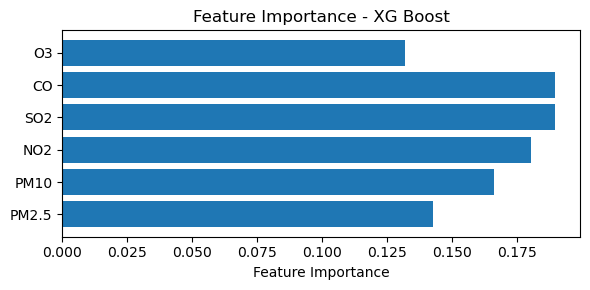

In [35]:
feature_importances_xg = final_model_xg.feature_importances_
feature_names_xg = X_train.columns

plt.figure(figsize=(6, 3))
plt.barh(feature_names_xg, feature_importances_xg)
plt.xlabel('Feature Importance')
plt.title('Feature Importance - XG Boost')
plt.tight_layout()
plt.show();

##Results

In [37]:
print("Random Forest Regressor")
print(f"Best Parameters: {grid_search.best_params_}")
print("Test MAE:", round(mae,5))
print("Most Important Feature: ", feature_names[feature_importances.argmax()])
print("-"*100)
print("XG Boost Regressor")
print(f"Best Parameters: {grid_search_xg.best_params_}")
print("Test MAE:", round(mae_xg,5))
print("Most Important Feature: ", feature_names_xg[feature_importances_xg.argmax()])

Random Forest Regressor
Best Parameters: {'max_depth': 20, 'n_estimators': 65}
Test MAE: 0.02835
Most Important Feature:  CO
----------------------------------------------------------------------------------------------------
XG Boost Regressor
Best Parameters: {'max_depth': 40, 'n_estimators': 75}
Test MAE: 0.02835
Most Important Feature:  CO


In [39]:
#Since the dataset (Delhi AQI) isn’t huge and both models perform equally well, 
#choosen Random Forest — it’s easier to interpret, faster to deploy, and lighter on dependencies.

import pickle
with open("./Models/rf_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("✅ Model saved successfully!")


✅ Model saved successfully!
